In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data=pd.read_csv('../notebooks/datasets/delivery-time-prediction.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [104]:
data.City.unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [5]:
data.shape

(45584, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [7]:
dropped_cols=['ID','Delivery_person_ID']
target_col='Time_taken (min)'

In [8]:
data.drop(dropped_cols,axis=1,inplace=True)

In [9]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [10]:
data.Order_Date=pd.to_datetime(data.Order_Date,format='%d-%m-%Y')
data.Order_Date.head()

0   2022-02-12
1   2022-02-13
2   2022-03-04
3   2022-02-13
4   2022-02-14
Name: Order_Date, dtype: datetime64[ns]

We store all the date related columns in the list date_cols, which can be further used in training pipeline

In [11]:
date_cols=['Order_Date']

In [12]:
def transform_date_column(date,format):
    date=pd.to_datetime(date,format=format)
    Year=date.dt.year
    Month=date.dt.month
    Day=date.dt.day
    return [Year,Month,Day]

In this dataset there is only one date column, but we can generalise the handling of date columns.

In [13]:
for column in date_cols:
    Year,Month,Day=transform_date_column(data[column],format='%d-%m-%Y')
    data[column+'_Year'], data[column+'_Month'], data[column+'_Day'] = Year, Month, Day
    data.drop(column,axis=1,inplace=True)

In [14]:
dropped_cols.append('Order_Date')

In [15]:
data.Order_Date_Day.unique()

array([12, 13,  4, 14,  2,  1, 16, 20, 15, 10, 11, 27, 26,  5,  8,  3, 30,
       28, 18,  6, 24, 19,  9, 25, 29, 31, 17,  7, 23, 21])

In [16]:
data.Order_Date_Month.unique()

array([2, 3, 4])

In [17]:
data.Order_Date_Year.unique()

array([2022])

In [18]:
## We can drop the year column since all the datapoints belong to same year
data.drop('Order_Date_Year',axis=1,inplace=True)

In [19]:
dropped_cols.extend(date_cols)

In [20]:
#Now we transform the time columns by splitting it into hours and minutes
time_cols=['Time_Orderd','Time_Order_picked']

In [21]:
data.Time_Orderd.unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '09:45',
       '08:40', '0.958333333', '17:25', nan, '19:45', '19:10', '10:55',
       '21:40', '0.791666667', '16:45', '11:30', '15:10', '22:45',
       '22:10', '20:45', '22:50', '17:55', '09:25', '20:15', '22:25',
       '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55',
       '20:10', '12:10', '15:30', '10:35', '21:10', '20:50', '12:35',
       '0.875', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '1', '14:20', '10:15', '08:50', '0.375',
       '17:45', '16:35', '08:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12

In [22]:
data.Time_Order_picked.unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25',
       '0.458333333', '19:15', '16:55', '11:40', '15:15', '22:55',
       '22:25', '20:55', '23:05', '0.75', '0.958333333', '09:40', '20:20',
       '22:35', '0.916666667', '23:55', '15:40', '10:30', '0.875',
       '10:50', '16:05', '20:15', '12:15', '15:45', '22:15', '10:45',
       '15:30', '24:05:00', '21:25', '12:45', '21:15', '18:20', '18:25',
       '11:50', '12:50', '10:55', '21:40', '10:20', '17:55', '23:50',
       '12:55', '24:10:00', '10:40', '0.375', '20:45', '0.833333333',
       '23:15', '22:20', '21:05', '0.708333333', '24:15:00', '21:20',
       '14:35', '10:25', '09:05', '16:50', '08:40', '23:40', '21:50',
       '19:55', '0.625', '1

## Here we can observe that the time is given in the form of a floating point number. We cannot drop those datapoints since there are many data points in that format. Instead we assume that this number represents the fraction of the day. Hence we extract the hours by multiplying it with 24

In [23]:
def transform_time_column(time):
    Hour=time.str.split(':').str[0]
    Minutes=time.str.split(':').str[1]
    Hour=Hour.astype(float)
    Minutes=Minutes.astype(float)
    f=lambda x : int(x*24) if x<1 else x
    Hour=Hour.apply(f)
    return Hour,Minutes

In [24]:
for column in time_cols:
    Hour,Minutes=transform_time_column(data[column])
    data[column+'_Hours'],data[column+'_Minutes']=Hour,Minutes
    data.drop(column,axis=1,inplace=True)

In [25]:
#We can see that the fractional values are modified.
data.Time_Orderd_Hours.unique()

array([21., 14., 17.,  9., 19., 20., 22.,  8., 12., 18., 23., 13., 10.,
       nan, 16., 11., 15.,  1.])

In [26]:
dropped_cols.extend(time_cols)

In [27]:
dropped_cols

['ID',
 'Delivery_person_ID',
 'Order_Date',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked']

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          44591 non-null  float64
 12  Festival                     45356 non-null  object 
 13  City            

In [29]:
#data.to_csv('../notebooks\datasets\delivery-time-prediction-cleaned.csv',index=False)

In [30]:
len(data.columns)

21

In [31]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),Order_Date_Month,Order_Date_Day,Time_Orderd_Hours,Time_Orderd_Minutes,Time_Order_picked_Hours,Time_Order_picked_Minutes
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3.0,No,Metropolitian,46,2,12,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1.0,No,Metropolitian,23,2,13,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,1.0,No,Metropolitian,21,3,4,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0.0,No,Metropolitian,20,2,13,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1.0,No,Metropolitian,41,2,14,19.0,50.0,20.0,5.0


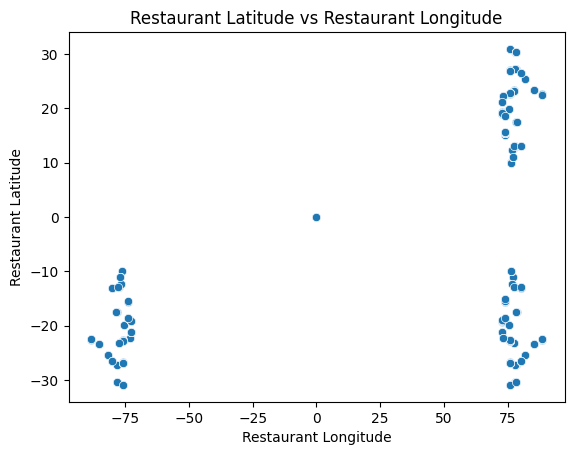

In [32]:
sns.scatterplot(x=data.Restaurant_longitude,y=data.Restaurant_latitude)
plt.xlabel('Restaurant Longitude')
plt.ylabel('Restaurant Latitude')
plt.title('Restaurant Latitude vs Restaurant Longitude')
plt.show()

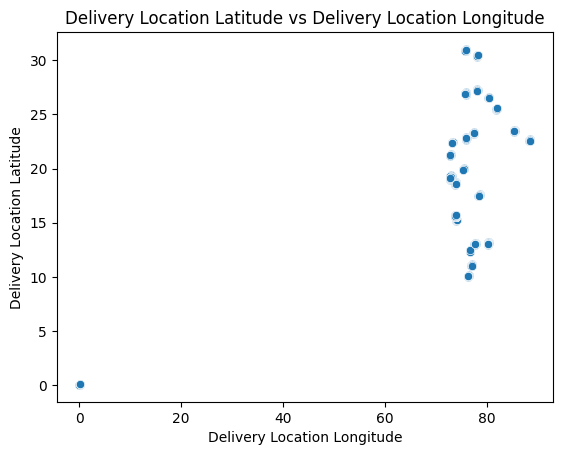

In [33]:
sns.scatterplot(x=data.Delivery_location_longitude,y=data.Delivery_location_latitude)
plt.xlabel('Delivery Location Longitude')
plt.ylabel('Delivery Location Latitude')
plt.title('Delivery Location Latitude vs Delivery Location Longitude')
plt.show()

In [34]:
import re

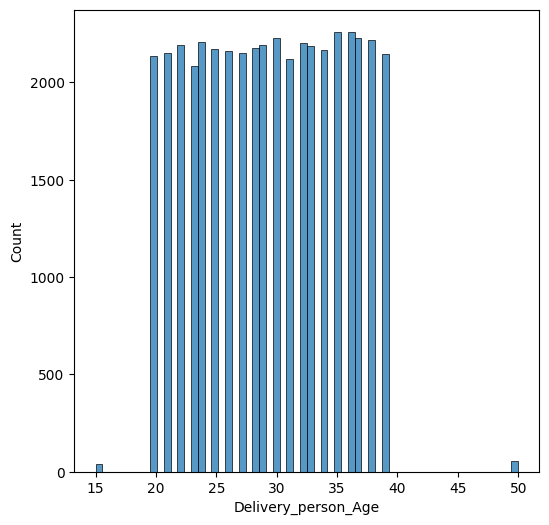

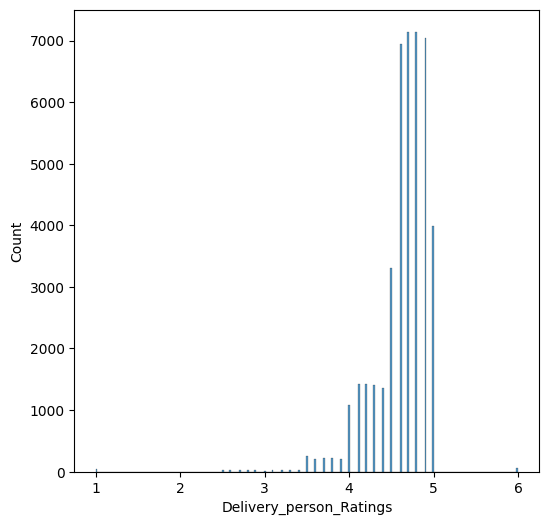

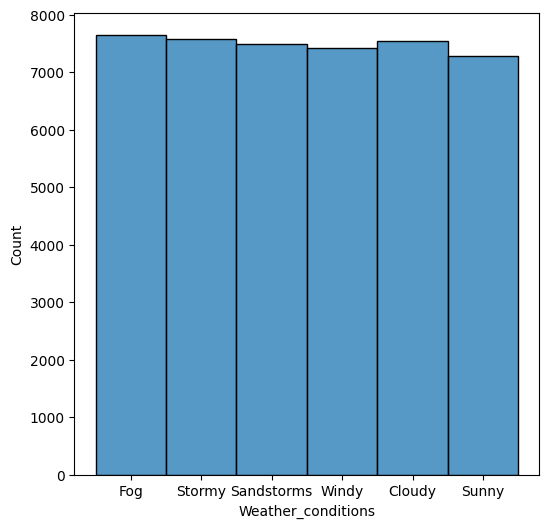

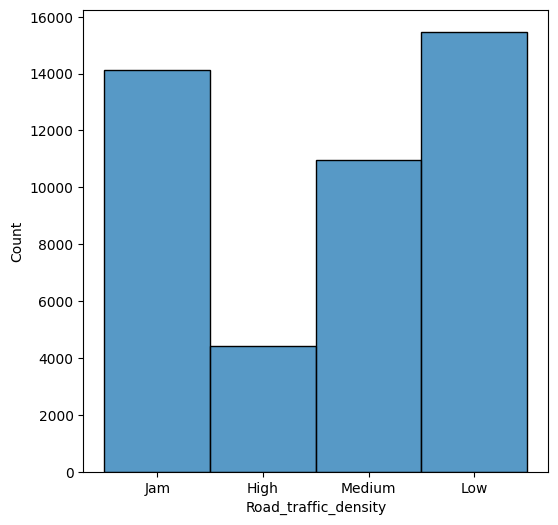

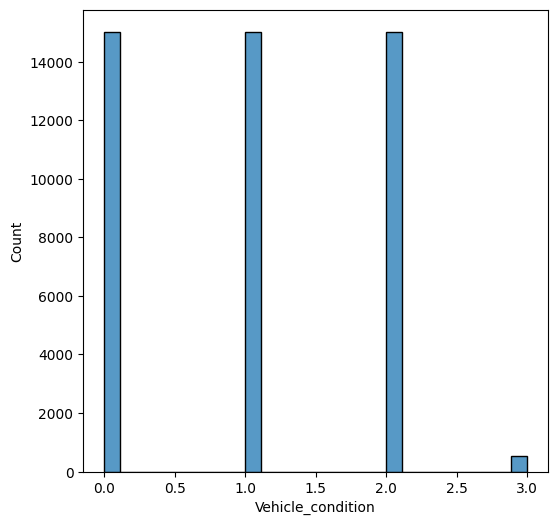

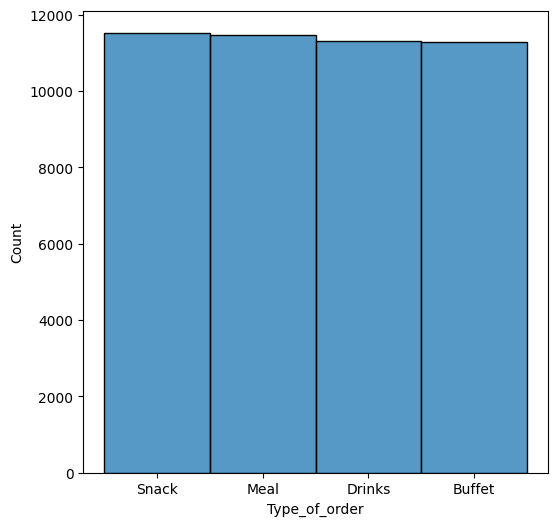

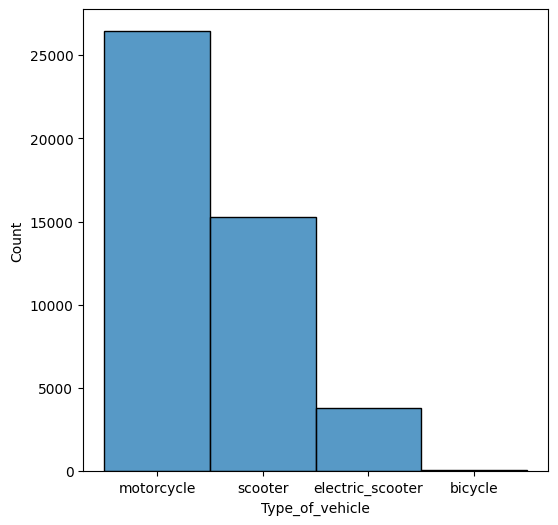

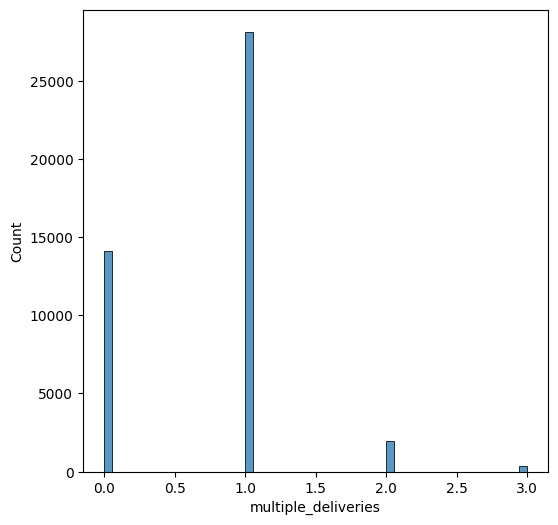

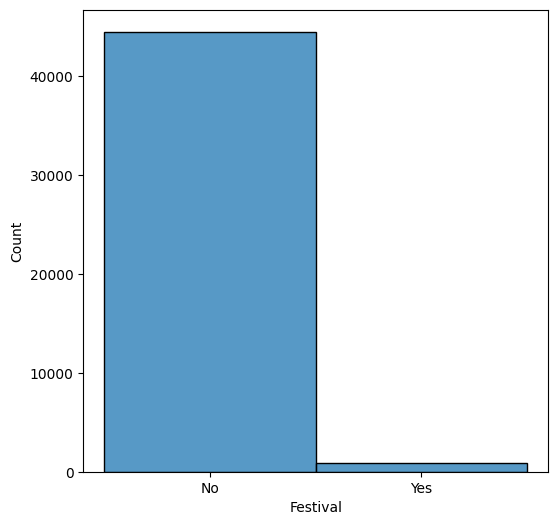

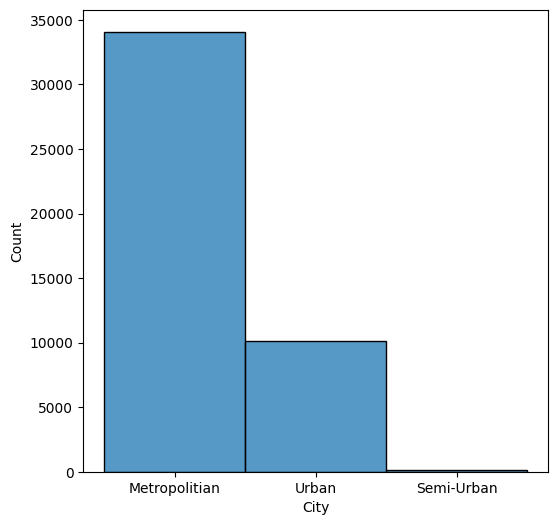

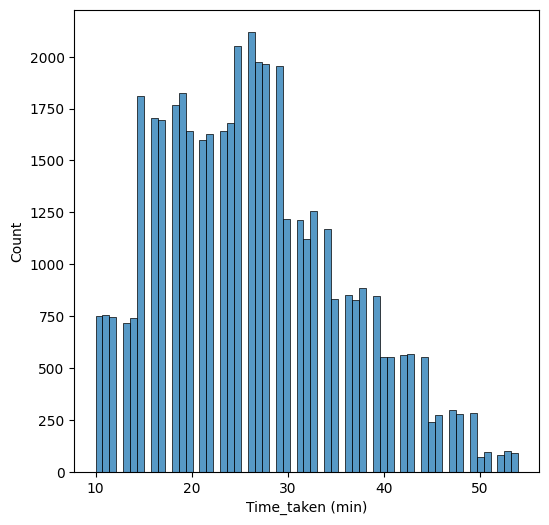

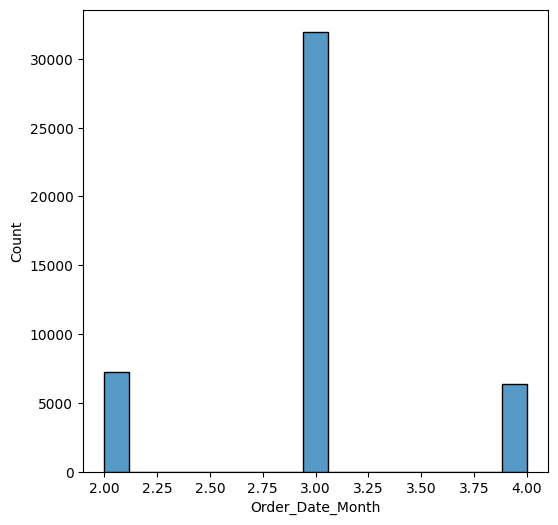

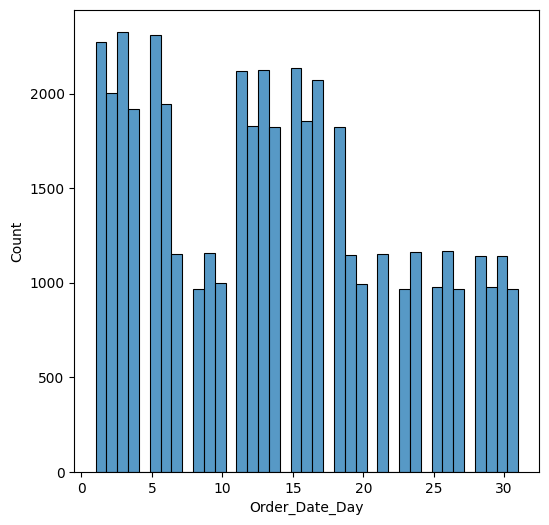

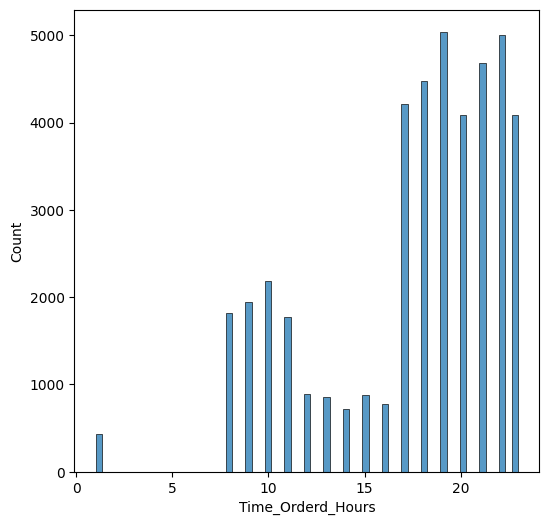

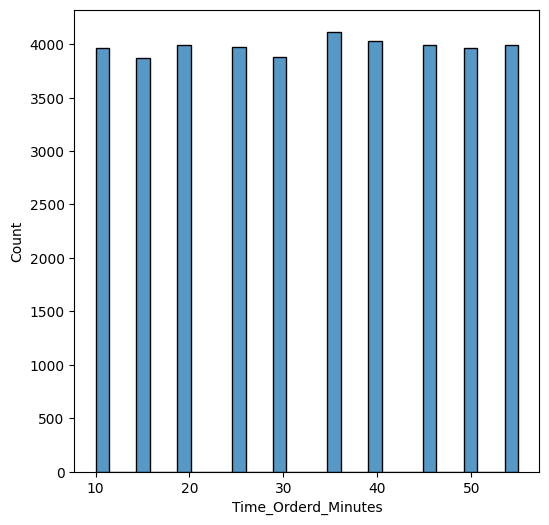

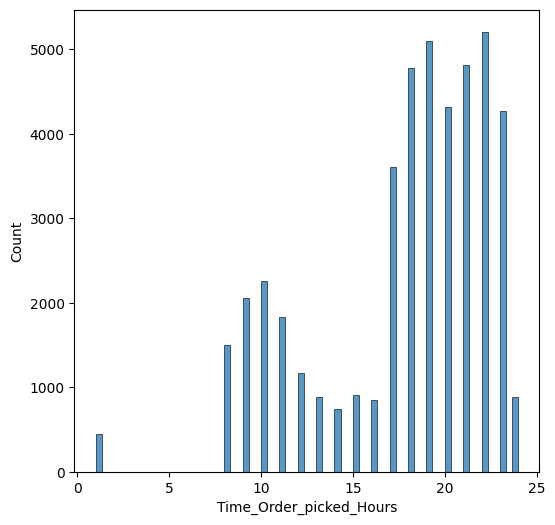

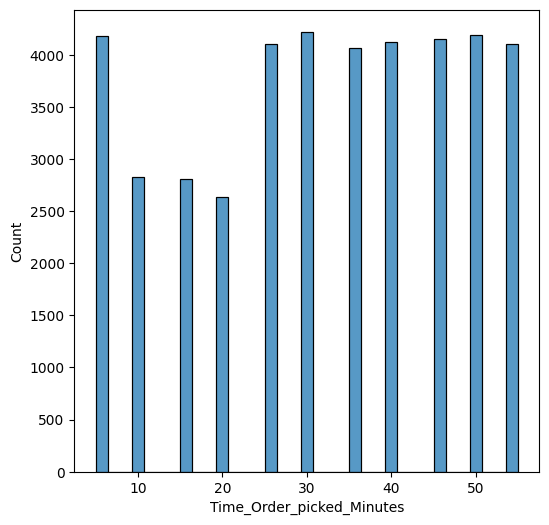

In [35]:
pattern = r'^(?=.*(_latitude|_longitude)$).*'
for column in data.columns:
    match = re.match(pattern, column, re.IGNORECASE)
    if not match:
        plt.figure(figsize=(6,6))
        sns.histplot(data=data[column])

In [36]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split

In [37]:
numerical_cols=data.select_dtypes(exclude='object').columns.to_list()
categorical_cols=data.select_dtypes(include='object').columns.to_list()
target_col='Time_taken (min)'
numerical_cols.remove(target_col)

In [38]:
data_train,data_test=train_test_split(data,test_size=0.3,random_state=42)

In [39]:
data_train.shape

(31908, 21)

In [40]:
data_test.shape

(13676, 21)

In [41]:
data_train.corr(numeric_only=True,method='spearman')

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Order_Date_Month,Order_Date_Day,Time_Orderd_Hours,Time_Orderd_Minutes,Time_Order_picked_Hours,Time_Order_picked_Minutes
Delivery_person_Age,1.000000,-0.095758,0.001137,0.003201,0.002869,0.004452,-0.000150,0.113778,0.305894,-0.005621,0.003075,-0.002184,-0.003811,-0.000358,0.004047
Delivery_person_Ratings,-0.095758,1.000000,-0.005967,-0.003237,-0.009086,-0.006423,0.065876,-0.093299,-0.289556,-0.002334,-0.008109,-0.024458,0.000597,-0.023840,-0.001066
Restaurant_latitude,0.001137,-0.005967,1.000000,0.124046,0.973036,0.113032,-0.008657,0.010526,0.011389,-0.098425,0.000991,0.006032,-0.002693,0.008977,-0.001991
Restaurant_longitude,0.003201,-0.003237,0.124046,1.000000,0.116782,0.987375,-0.006786,0.007781,0.003776,-0.058562,0.010218,-0.006365,0.004083,-0.009556,0.002767
Delivery_location_latitude,0.002869,-0.009086,0.973036,0.116782,1.000000,0.123982,0.001661,0.017253,0.027304,-0.115362,0.005258,0.035165,-0.002356,0.038893,-0.001514
Delivery_location_longitude,0.004452,-0.006423,0.113032,0.987375,0.123982,1.000000,0.001395,0.014843,0.023662,-0.060180,0.014010,0.028559,0.003679,0.026122,0.002735
Vehicle_condition,-0.000150,0.065876,-0.008657,-0.006786,0.001661,0.001395,1.000000,-0.087298,-0.223199,0.005285,-0.002877,0.000907,-0.000320,0.003617,0.009808
multiple_deliveries,0.113778,-0.093299,0.010526,0.007781,0.017253,0.014843,-0.087298,1.000000,0.337052,-0.016138,0.018398,0.035564,0.005951,0.039827,0.000354
Time_taken (min),0.305894,-0.289556,0.011389,0.003776,0.027304,0.023662,-0.223199,0.337052,1.000000,-0.015300,0.027407,0.099631,0.000322,0.103286,-0.001698
Order_Date_Month,-0.005621,-0.002334,-0.098425,-0.058562,-0.115362,-0.060180,0.005285,-0.016138,-0.015300,1.000000,-0.365174,-0.002714,0.003467,-0.006003,-0.000276


<Axes: >

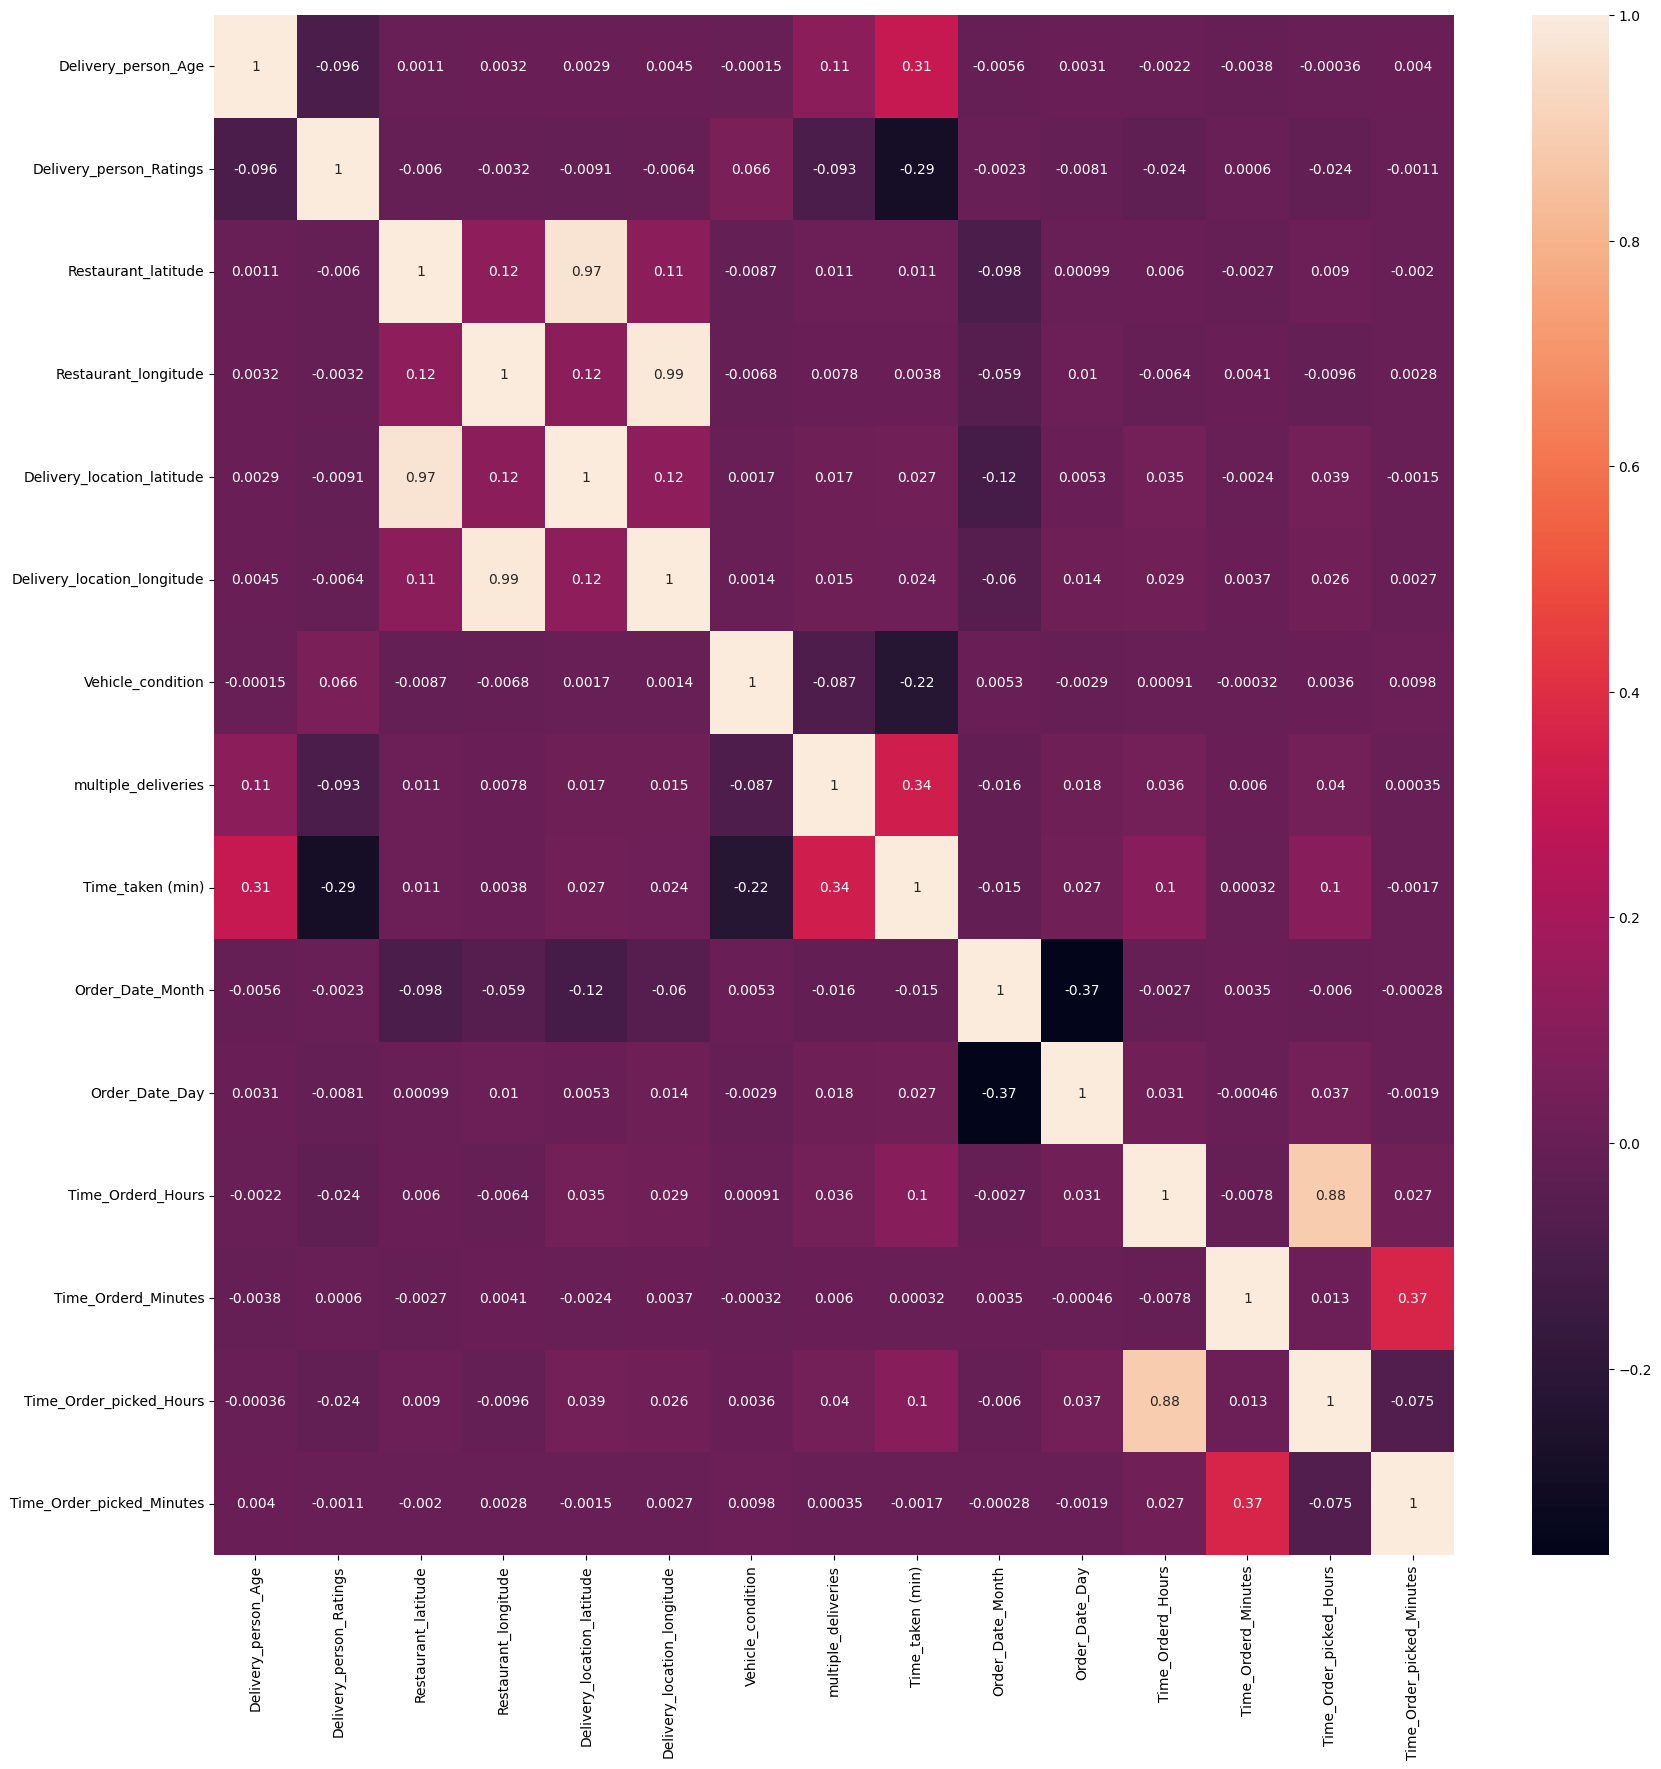

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(method='spearman',numeric_only=True),annot=True)

In [43]:
def select_correlated_cols(corr,threshold=0.75):
    corr_feats=set()
    for column in corr:
        if column not in corr_feats:
            for j in corr.columns:
                if column!=j and corr.loc[column,j]>threshold:
                    corr_feats.add(j)
    return corr_feats

In [44]:
corr_feats=select_correlated_cols(data_train.corr(method='spearman',numeric_only=True))
corr_feats

{'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Time_Order_picked_Hours'}

In [45]:
data_train.drop(corr_feats,axis=1,inplace=True)
data_test.drop(corr_feats,axis=1,inplace=True)

In [46]:
dropped_cols.extend(corr_feats)

In [47]:
data_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Date_Month,Order_Date_Day,Time_Orderd_Hours,Time_Orderd_Minutes,Time_Order_picked_Minutes
32032,35.0,4.6,0.000000,0.000000,Windy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,26,3,20,17.0,15.0,30.0
1953,38.0,4.7,23.374989,85.335486,Sandstorms,High,2,Buffet,motorcycle,1.0,No,Metropolitian,29,3,5,13.0,30.0,40.0
5729,36.0,4.8,17.424114,78.347554,Stormy,Low,2,Drinks,electric_scooter,0.0,No,Urban,17,3,8,22.0,35.0,40.0
41624,27.0,5.0,22.695207,75.866059,Stormy,Medium,2,Drinks,motorcycle,0.0,No,Metropolitian,24,3,19,16.0,35.0,40.0
40690,38.0,4.7,22.514119,88.362504,Cloudy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,46,2,18,20.0,50.0,55.0


## As we can observe that the independent features does not have a strong correlation with the dependent feature time taken.As correlation explains only the linear relationship among the features, hence we cannot decide the importance of a feature solely on the basis of correlation. There may be a non linear relationship.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [49]:
for column in dropped_cols:
    if column in numerical_cols:
        numerical_cols.remove(column)
    if column in categorical_cols:
        categorical_cols.remove(column)

In [50]:
categorical_cols

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [51]:
Weather_conditions=['Sunny','Cloudy','Fog','Windy','Stormy','Sandstorms']
Road_traffic_density=['Low','Medium','High','Jam']
Type_of_order=['Snack','Drinks','Meal','Buffet']
Type_of_vehicle=['bicycle','motorcycle','electric_scooter','scooter']
Festival=['No','Yes']
City=['Semi-Urban','Urban','Metropolitian']

In [52]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
     ('scaler',StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder',OrdinalEncoder(categories=[Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City])),
     ('scaler',StandardScaler())
    ]
)

In [53]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [54]:
X_train=data_train.drop(target_col,axis=1)
y_train=data_train[target_col]
X_test=data_test.drop(target_col,axis=1)
y_test=data_test[target_col]

In [55]:
inp_cols=numerical_cols+categorical_cols

In [56]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=inp_cols)
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=inp_cols)

In [57]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Vehicle_condition,multiple_deliveries,Order_Date_Month,Order_Date_Day,Time_Orderd_Hours,Time_Orderd_Minutes,Time_Order_picked_Minutes,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0.954495,-0.108398,-2.076627,-3.060210,-0.028178,0.441723,0.035210,0.713479,-0.099148,-1.333471,-0.089209,0.294374,-0.293488,-0.442422,1.344419,-0.141231,0.537626
1,1.480327,0.194710,0.776439,0.660475,1.165832,0.441723,0.035210,-1.006928,-0.952159,-0.215874,0.573459,1.478922,0.507865,1.343047,-0.812492,-0.141231,0.537626
2,1.129772,0.497818,0.050097,0.355796,1.165832,-1.324947,0.035210,-0.662846,0.967116,0.156658,0.573459,0.886648,-1.094840,-0.442422,0.265964,-0.141231,-1.788732
3,-0.447724,1.104034,0.693467,0.247601,1.165832,-1.324947,0.035210,0.598785,-0.312400,0.156658,0.573459,0.886648,-0.293488,-0.442422,-0.812492,-0.141231,0.537626
4,1.480327,0.194710,0.671364,0.792455,-1.222187,0.441723,-1.791606,0.484091,0.540610,1.274254,1.567461,-0.890175,1.309217,-1.335157,-0.812492,-0.141231,0.537626


In [58]:
X_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Vehicle_condition,multiple_deliveries,Order_Date_Month,Order_Date_Day,Time_Orderd_Hours,Time_Orderd_Minutes,Time_Order_picked_Minutes,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0.428663,-1.623938,1.029747,0.507820,-1.222187,0.441723,-1.791606,-0.089378,-0.099148,-1.333471,-0.089209,1.478922,-0.293488,-1.335157,-0.812492,-0.141231,0.537626
1,0.428663,0.800926,-0.572117,0.280435,-0.028178,0.441723,0.035210,-1.236315,-2.018422,0.156658,0.904793,0.294374,-1.094840,-1.335157,-0.812492,-0.141231,0.537626
2,-1.148834,-0.411506,-2.076627,-3.060210,1.165832,0.441723,-1.791606,0.025316,0.753863,1.274254,-1.745880,-1.482449,1.309217,-1.335157,1.344419,-0.141231,0.537626
3,-1.324111,-0.411506,1.213577,0.243703,-1.222187,0.441723,0.035210,-0.089378,0.967116,0.901722,1.236127,0.886648,-1.094840,-1.335157,-0.812492,-0.141231,0.537626
4,-0.097169,0.800926,-0.574296,0.282471,-1.222187,0.441723,0.035210,0.025316,0.753863,-0.960939,0.242125,-0.890175,1.309217,-0.442422,-0.812492,-0.141231,0.537626


In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer

In [60]:
def adjusted_r2_score(r2,shape):
    n=shape[0]
    return 1 - (1-r2)*(n-1)/(n-shape[1]-1)

In [61]:
def evaluate_model(y_true,y_pred):
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_true,y_pred)
    return mae,rmse,r2

In [62]:
def train_evaluate_model(models_dict,X_train,y_train,X_test,y_test):
    metrics=['r2 score','adjusted_r2_score','Root Mean Squared Error','Mean Absolute Error']
    cols=pd.MultiIndex.from_product([['Training Dataset','Test Dataset'],metrics])
    report=pd.DataFrame(index=models_dict.keys(),columns=cols)
    for model in models_dict:
        trainer=models_dict[model]
        trainer.fit(X_train,y_train)
        
        y_pred_train=trainer.predict(X_train)
        y_pred_test=trainer.predict(X_test)

        mse_train=mean_squared_error(y_train,y_pred_train)
        mse_test=mean_squared_error(y_test,y_pred_test)

        mae_train=mean_absolute_error(y_train,y_pred_train)
        mae_test=mean_absolute_error(y_test,y_pred_test)

        report.loc[model,('Training Dataset','Mean Absolute Error')]=mae_train
        report.loc[model,('Test Dataset','Mean Absolute Error')]=mae_test

        rmse_train=np.sqrt(mse_train)
        rmse_test=np.sqrt(mse_test)

        report.loc[model,('Training Dataset','Root Mean Squared Error')]=rmse_train
        report.loc[model,('Test Dataset','Root Mean Squared Error')]=rmse_test

        r2_score_train=r2_score(y_train,y_pred_train)
        r2_score_test=r2_score(y_test,y_pred_test)

        report.loc[model,('Training Dataset','r2 score')]=r2_score_train
        report.loc[model,('Test Dataset','r2 score')]=r2_score_test

        adjusted_r2_score_train=adjusted_r2_score(r2_score_train,X_test.shape)
        adjusted_r2_score_test=adjusted_r2_score(r2_score_test,X_test.shape)

        report.loc[model,('Training Dataset','adjusted_r2_score')]=adjusted_r2_score_train
        report.loc[model,('Test Dataset','adjusted_r2_score')]=adjusted_r2_score_test
    
    return report

In [63]:
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV

In [64]:
linear_models_dict={
    'LinearRegression':LinearRegression(),
    'RidgeCV':RidgeCV(alphas=np.arange(0.1,10,0.2)),
    'LassoCV':LassoCV(alphas=np.arange(0.1,10,0.2)),
    'ElasticNetCV':ElasticNetCV(alphas=np.arange(0.1,10,0.2))
}

In [65]:
train_evaluate_model(linear_models_dict,X_train,y_train,X_test,y_test)

Training Dataset                                             
                         r2 score adjusted_r2_score Root Mean Squared Error   
LinearRegression         0.484916          0.484275                6.714152  \
RidgeCV                  0.484916          0.484275                6.714152   
LassoCV                  0.483859          0.483216                6.721037   
ElasticNetCV             0.483524          0.482881                6.723218   

                                     Test Dataset                     
                 Mean Absolute Error     r2 score adjusted_r2_score   
LinearRegression            5.302828     0.489496          0.488861  \
RidgeCV                     5.302848     0.489494          0.488859   
LassoCV                     5.311546     0.488995          0.488359   
ElasticNetCV                5.315195     0.488099          0.487462   

                                                              
                 Root Mean Squared Error Mean Absolute Error  
LinearRegression                6.753084            5.340694  
RidgeCV                         6.753096            5.340729  
LassoCV                         6.756399            5.347184  
ElasticNetCV                    6.762319            5.354865

## We can observe from the above report that the linear models are failing to explain the variability in the data. We can now train the model with other algorithms like Decision Tree Regressor and Random Forest Regressor which can perform better for non linear data

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [67]:
#Model training and evaluation before hyperparameter tuning.
tree_models_dict={
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [68]:
train_evaluate_model(tree_models_dict,X_train,y_train,X_test,y_test)

Training Dataset                     
                              r2 score adjusted_r2_score   
DecisionTreeRegressor              1.0               1.0  \
RandomForestRegressor         0.963279          0.963233   

                                                                    
                      Root Mean Squared Error Mean Absolute Error   
DecisionTreeRegressor                     0.0                 0.0  \
RandomForestRegressor                1.792712             1.37912   

                      Test Dataset                                             
                          r2 score adjusted_r2_score Root Mean Squared Error   
DecisionTreeRegressor     0.543703          0.543135                6.384495  \
RandomForestRegressor     0.737727            0.7374                4.840382   

                                           
                      Mean Absolute Error  
DecisionTreeRegressor            4.759871  
RandomForestRegressor            3.773819

## From the above report we can clearly infer that the models are overfitting, hence we fine tune the hyperparameters and then build the model again

In [69]:
hyperparametrs_dict={
    'DecisionTreeRegressor':{
    #'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    #'min_samples_split':[2,4,6,8,10],
    #'min_samples_leaf':[2,4,6,8,10],
    'max_depth':[5,10,15,20,25,30],
    #'max_features':['sqrt','log2']
    
    },
    'RandomForestRegressor':{
    #'n_estimators':[100,200,300,400,500],
    #'min_samples_split':[2,4,6,8,10],
    #'min_samples_leaf':[2,4,6,8,10],
    #'max_features':['sqrt','log2'],
    'max_depth':[5,10,15,20,25,30]
    }
}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
def tune_hyperparameters(models_dict,hyperparametrs_dict,X_train,y_train):
    best_params_dict={}
    for model in models_dict:
        params=hyperparametrs_dict[model]
        gsearch=GridSearchCV(estimator=models_dict[model],param_grid=params,cv=5,scoring='r2',n_jobs=-1,verbose=4)
        gsearch.fit(X_train,y_train)
        best_params_dict[model]=gsearch.best_params_
    return best_params_dict

In [72]:
#Model training and evaluation for hyperparameter tuning.
tree_models_dict_tuned={
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [73]:
best_params_dict=tune_hyperparameters(tree_models_dict_tuned,hyperparametrs_dict,X_train,y_train)
best_params_dict

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'DecisionTreeRegressor': {'max_depth': 10},
 'RandomForestRegressor': {'max_depth': 15}}

In [74]:
tree_models_dict_tuned={}
tree_models_dict_tuned['DecisionTreeRegressor']=DecisionTreeRegressor(**best_params_dict['DecisionTreeRegressor'])
tree_models_dict_tuned['RandomForestRegressor']=RandomForestRegressor(**best_params_dict['RandomForestRegressor'])

In [75]:
train_evaluate_model(tree_models_dict_tuned,X_train,y_train,X_test,y_test)

Training Dataset                     
                              r2 score adjusted_r2_score   
DecisionTreeRegressor         0.738067          0.737741  \
RandomForestRegressor          0.86106          0.860887   

                                                                    
                      Root Mean Squared Error Mean Absolute Error   
DecisionTreeRegressor                4.787924            3.672842  \
RandomForestRegressor                3.487106            2.614951   

                      Test Dataset                                             
                          r2 score adjusted_r2_score Root Mean Squared Error   
DecisionTreeRegressor     0.714663          0.714308                 5.04872  \
RandomForestRegressor     0.739297          0.738973                4.825869   

                                           
                      Mean Absolute Error  
DecisionTreeRegressor            3.940735  
RandomForestRegressor            3.770431

 We can observe that the r2_score of RandomForest is much higher than that of Linear Regression models.
 We can also extract important features from the trained RandomForestModel

In [76]:
rfr=tree_models_dict_tuned['RandomForestRegressor']

In [77]:
imp_feats_array=rfr.feature_importances_

In [78]:
feats_df=pd.DataFrame({'Feature Name':inp_cols,'Feature Importance':imp_feats_array})
feats_df=feats_df.sort_values(by='Feature Importance',ascending=False)
feats_df

,Feature Name,Feature Importance
1,Delivery_person_Ratings,0.225229
12,Road_traffic_density,0.162535
5,multiple_deliveries,0.139383
11,Weather_conditions,0.126031
0,Delivery_person_Age,0.094260
4,Vehicle_condition,0.077914
7,Order_Date_Day,0.030792
8,Time_Orderd_Hours,0.030116
15,Festival,0.024348
2,Restaurant_latitude,0.022231


<Axes: xlabel='Feature Name', ylabel='Feature Importance'>

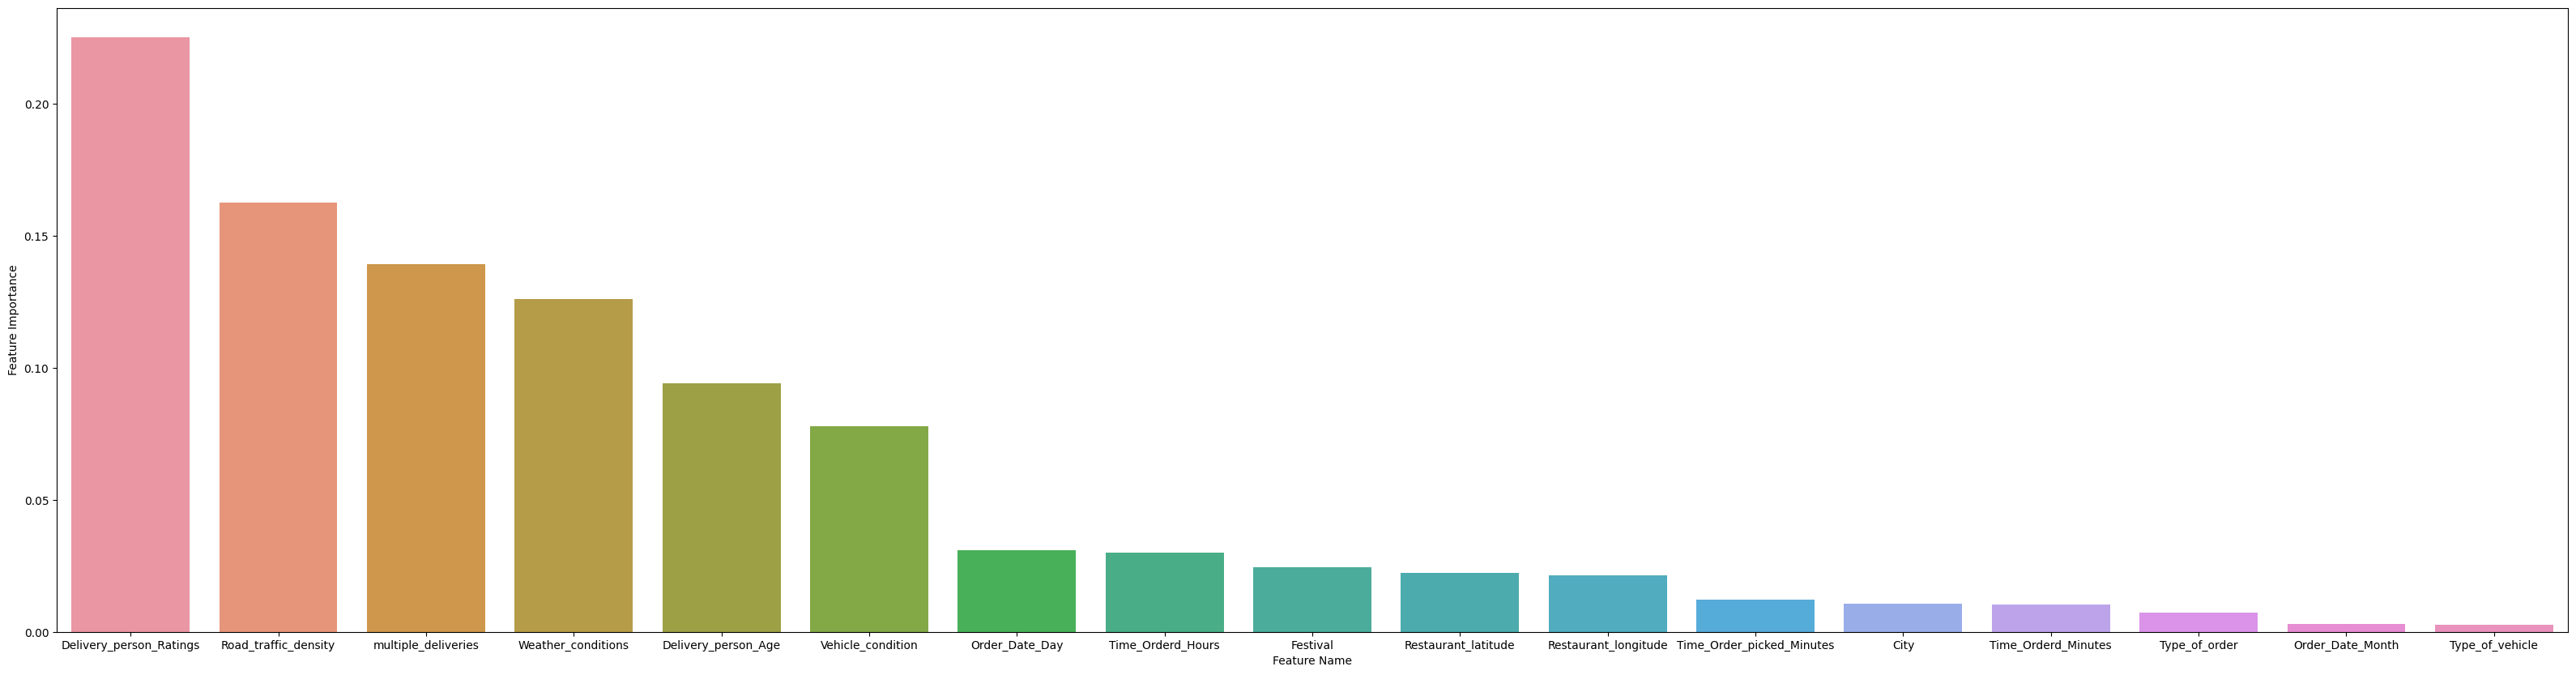

In [79]:
plt.figure(figsize=(40,10))
sns.barplot(x=feats_df['Feature Name'],y=feats_df['Feature Importance'])

In [80]:
feats_df['Feature Name']

1       Delivery_person_Ratings
12         Road_traffic_density
5           multiple_deliveries
11           Weather_conditions
0           Delivery_person_Age
4             Vehicle_condition
7                Order_Date_Day
8             Time_Orderd_Hours
15                     Festival
2           Restaurant_latitude
3          Restaurant_longitude
10    Time_Order_picked_Minutes
16                         City
9           Time_Orderd_Minutes
13                Type_of_order
6              Order_Date_Month
14              Type_of_vehicle
Name: Feature Name, dtype: object

In [81]:
dropped_cols.extend(['Type_of_order','Order_Date_Month','Type_of_vehicle'])

In [82]:
X_train.drop(['Type_of_order','Order_Date_Month','Type_of_vehicle'],axis=1,inplace=True)
X_test.drop(['Type_of_order','Order_Date_Month','Type_of_vehicle'],axis=1,inplace=True)

In [83]:
tree_models_dict_tuned={}
tree_models_dict_tuned['DecisionTreeRegressor']=DecisionTreeRegressor(**best_params_dict['DecisionTreeRegressor'])
tree_models_dict_tuned['RandomForestRegressor']=RandomForestRegressor(**best_params_dict['RandomForestRegressor'])

In [84]:
train_evaluate_model(tree_models_dict_tuned,X_train,y_train,X_test,y_test)

Training Dataset                     
                              r2 score adjusted_r2_score   
DecisionTreeRegressor         0.738031          0.737763  \
RandomForestRegressor         0.858748          0.858603   

                                                                    
                      Root Mean Squared Error Mean Absolute Error   
DecisionTreeRegressor                4.788249            3.673291  \
RandomForestRegressor                3.516006            2.640605   

                      Test Dataset                                             
                          r2 score adjusted_r2_score Root Mean Squared Error   
DecisionTreeRegressor     0.714281          0.713988                5.052102  \
RandomForestRegressor     0.739456          0.739189                4.824396   

                                           
                      Mean Absolute Error  
DecisionTreeRegressor            3.944297  
RandomForestRegressor            3.769529

In [85]:
for column in dropped_cols:
    if column in numerical_cols:
        numerical_cols.remove(column)
    elif column in categorical_cols:
        categorical_cols.remove(column)

In [86]:
numerical_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Order_Date_Day',
 'Time_Orderd_Hours',
 'Time_Orderd_Minutes',
 'Time_Order_picked_Minutes']

In [87]:
categorical_cols

['Weather_conditions', 'Road_traffic_density', 'Festival', 'City']

In [88]:
X_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Vehicle_condition', 'multiple_deliveries',
       'Order_Date_Day', 'Time_Orderd_Hours', 'Time_Orderd_Minutes',
       'Time_Order_picked_Minutes', 'Weather_conditions',
       'Road_traffic_density', 'Festival', 'City'],
      dtype='object')

In [89]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Vehicle_condition,multiple_deliveries,Order_Date_Day,Time_Orderd_Hours,Time_Orderd_Minutes,Time_Order_picked_Minutes,Weather_conditions,Road_traffic_density,Festival,City
0,0.954495,-0.108398,-2.076627,-3.060210,-0.028178,0.441723,0.713479,-0.099148,-1.333471,-0.089209,0.294374,-0.293488,-0.141231,0.537626
1,1.480327,0.194710,0.776439,0.660475,1.165832,0.441723,-1.006928,-0.952159,-0.215874,0.573459,1.478922,0.507865,-0.141231,0.537626
2,1.129772,0.497818,0.050097,0.355796,1.165832,-1.324947,-0.662846,0.967116,0.156658,0.573459,0.886648,-1.094840,-0.141231,-1.788732
3,-0.447724,1.104034,0.693467,0.247601,1.165832,-1.324947,0.598785,-0.312400,0.156658,0.573459,0.886648,-0.293488,-0.141231,0.537626
4,1.480327,0.194710,0.671364,0.792455,-1.222187,0.441723,0.484091,0.540610,1.274254,1.567461,-0.890175,1.309217,-0.141231,0.537626


In [90]:
import xgboost as xgb

Due to computation constraints, hyperparameter tuning is performed in a different machine and best params are extracted.

In [91]:
best_params={'n_estimators': 100,
 'min_child_weight': 40,
 'max_depth': 10,
 'learning_rate': 0.1}

In [92]:
xboost=xgb.XGBRegressor(gamma=0.05,**best_params)
xboost.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.05, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [93]:
y_train_pred=xboost.predict(X_train)
y_test_pred=xboost.predict(X_test)

In [94]:
print('training score' ,r2_score(y_train,y_train_pred))
print('testing score' ,r2_score(y_test,y_test_pred))

training score 0.8498547311542408
testing score 0.7992818088245806


# We can conclude that out of all algorithms, XGBoost Regressor performed well with high train and test score.

In [95]:
Weather_conditions=['Sunny','Cloudy','Fog','Windy','Stormy','Sandstorms']
Road_traffic_density=['Low','Medium','High','Jam']
Festival=['No','Yes']
City=['Semi-Urban','Urban','Metropolitian']

In [96]:
cat_features_encoding_order={
    'Weather_conditions':Weather_conditions,
    'Road_traffic_density':Road_traffic_density,
    'Festival':Festival,
    'City':City
}

features_dict={
    'dropped_cols':dropped_cols,
    'numerical_cols':numerical_cols,
    'categorical_cols':categorical_cols,
    'target_col':target_col,
    'date_cols':date_cols,
    'time_cols':time_cols
}

In [97]:
import json

In [98]:
#We store all the feature artifacts in a json file, so that it can be used in the training pipeline.
with open('../src/feature_engineering_artifacts/encoding.json','w') as f:
    json.dump(cat_features_encoding_order,f)

with open('../src/feature_engineering_artifacts/features_dict.json', 'w') as f:
    json.dump(features_dict, f)